In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [83]:
# Read csv file
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [85]:
# Drop columns which are not required
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [87]:
# Check any null value
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

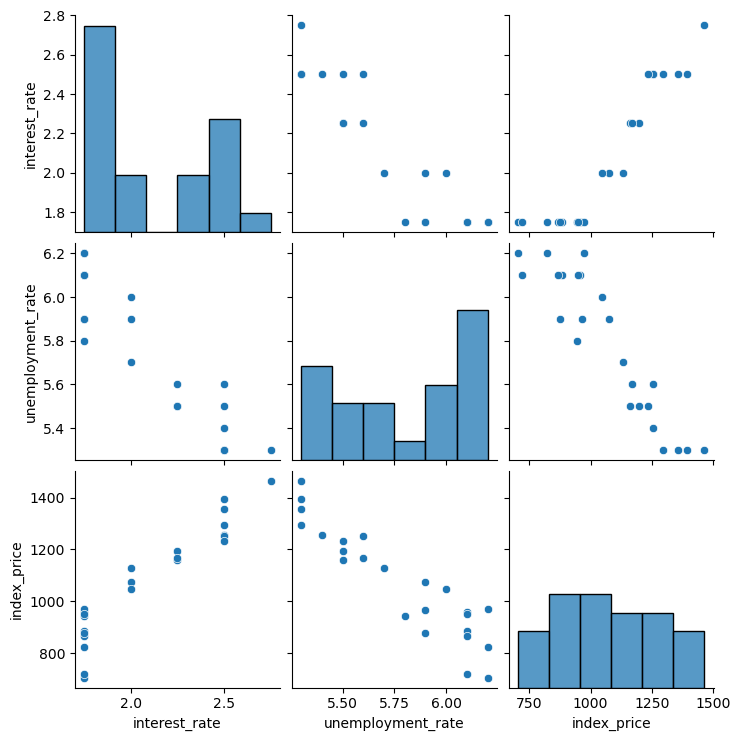

In [89]:
# Visualize our data
sns.pairplot(df)
plt.show()

In [91]:
# identify correlation
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


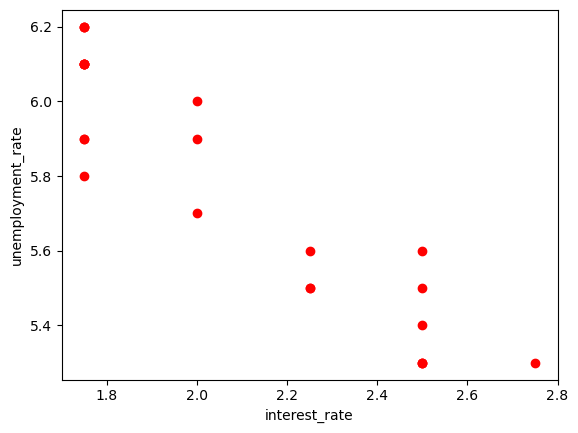

In [93]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')
plt.show()

In [112]:
# Get independent and dependent features
X = df[['interest_rate','unemployment_rate']]
y=df['index_price']

In [114]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [116]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [118]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [130]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [136]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [140]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [142]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [144]:
regression.fit(X_train,y_train)

LinearRegression()

In [146]:
# Perfor cross validations
from sklearn.model_selection import cross_val_score
score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [150]:
np.mean(score)

-5914.828180162389

In [152]:
#Predictions
y_pred = regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [154]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('Mean squared error is :- ', mse)
print('Mean absolute error is :- ', mae)
print('Root Mean squared error is :- ', rmse)

Mean squared error is :-  5793.762887712583
Mean absolute error is :-  59.93578152323558
Root Mean squared error is :-  76.11677139574815


In [160]:
# R squared 
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.8278978091457141

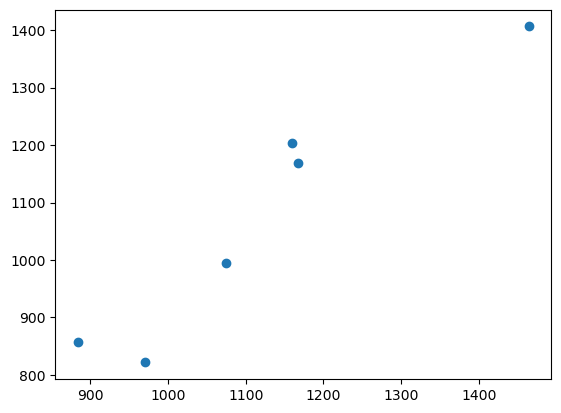

In [162]:
#Assumptions

plt.scatter(y_test,y_pred)
plt.show()

In [164]:
residuals = y_test - y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

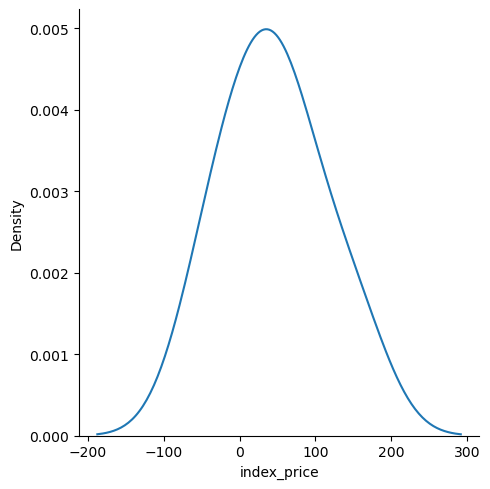

In [168]:
# Plot residuals
sns.displot(residuals,kind='kde')
plt.show()

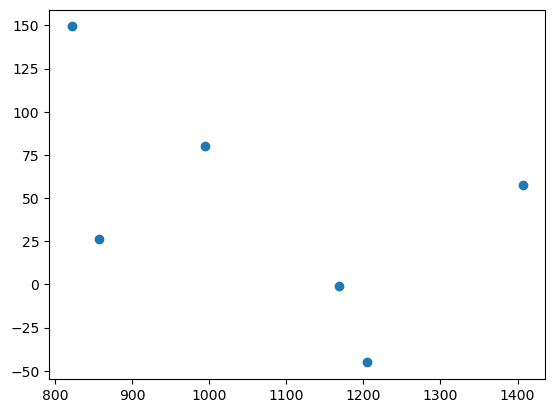

In [172]:
#Scatter plot with respect to predictions and residuals
plt.scatter(y_pred,residuals)
plt.show()